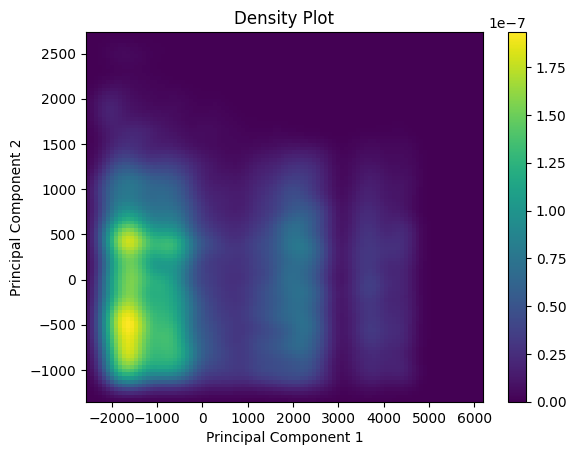

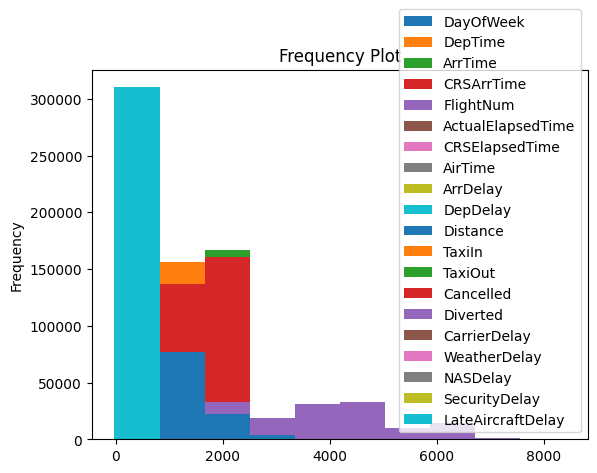

<ipython-input-1-3e8ceec2fb3c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
<ipython-input-1-3e8ceec2fb3c>:36: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = data.median()


Mean: DayOfWeek               3.966447
DepTime              1556.399912
ArrTime              1615.361277
CRSArrTime           1642.839211
FlightNum            2154.994276
ActualElapsedTime     133.288993
CRSElapsedTime        130.110936
AirTime               107.547177
ArrDelay               61.000210
DepDelay               57.822126
Distance              738.470976
TaxiIn                  6.796386
TaxiOut                18.945448
Cancelled               0.000000
Diverted                0.000000
CarrierDelay           17.645500
WeatherDelay            3.485797
NASDelay               13.126560
SecurityDelay           0.092861
LateAircraftDelay      26.649118
dtype: float64
Median: DayOfWeek               4.0
DepTime              1614.0
ArrTime              1731.0
CRSArrTime           1715.0
FlightNum            1506.0
ActualElapsedTime     115.0
CRSElapsedTime        111.0
AirTime                88.0
ArrDelay               42.0
DepDelay               40.0
Distance              590.0
Tax

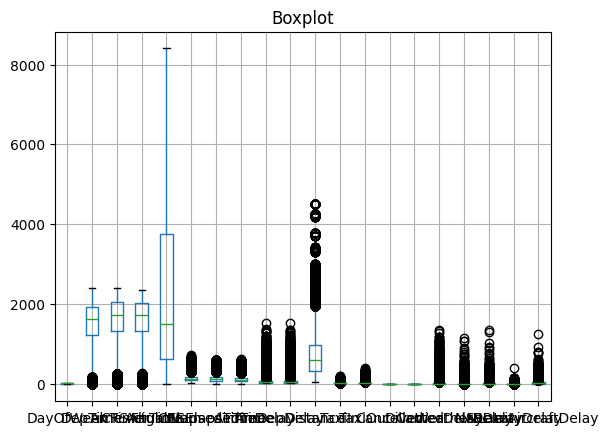

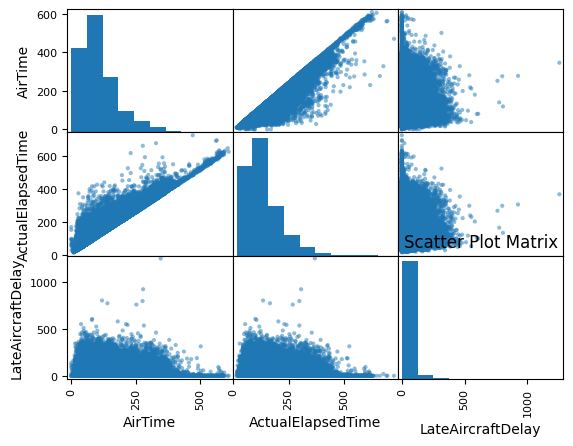

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.stats import gaussian_kde

data = pd.read_csv('/content/Flight_delay (1).csv')
numeric_data = data.select_dtypes(include=[np.number])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_data_imputed)
kde = gaussian_kde(reduced_data.T)

x, y = reduced_data[:, 0], reduced_data[:, 1]
x_grid, y_grid = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
density = kde(positions).reshape(x_grid.shape)

plt.imshow(density.T, origin='lower', aspect='auto', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.title('Density Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

data.plot(kind='hist')
plt.title('Frequency Plot')
plt.show()

mean = data.mean()
median = data.median()
print('Mean:', mean)
print('Median:', median)

data.boxplot()
plt.title('Boxplot')
plt.show()

correlation_data = data[['AirTime', 'ActualElapsedTime', 'LateAircraftDelay']]
scatter_matrix = pd.plotting.scatter_matrix(correlation_data)
plt.title('Scatter Plot Matrix')
plt.show()

data[['AirTime', 'ActualElapsedTime', 'LateAircraftDelay']].plot(kind='bar')
plt.title('Barplot')
plt.show()

data.plot(kind='line')
plt.title('Line Plot')
plt.savefig('line_plot.png')